In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
import collections
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
input_text = au.read_txt_file_lines()
n_rows = len(input_text)
n_cols = len(input_text[0])
for ii in range(1, n_rows):
    assert len(input_text[ii]) == n_cols, f'row {ii} has {len(input_text[ii])} cols, not {n_cols}'
print(f'input has {n_rows} rows and {n_cols} cols')

input has 131 rows and 131 cols


(65, 65)


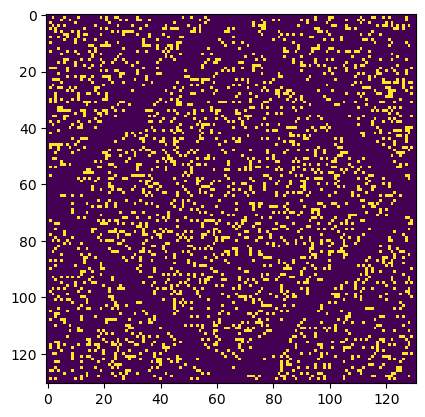

In [10]:
for ii in range(n_rows):
    for jj in range(n_cols):
        if input_text[ii][jj] == 'S':
            start = (ii, jj)
            print(start)

empty_map = np.zeros((n_rows, n_cols), dtype=int)
for ii in range(n_rows):
    for jj in range(n_cols):
        if input_text[ii][jj] == '.':
            empty_map[ii, jj] = 0
        elif input_text[ii][jj] == '#':
            empty_map[ii, jj] = 1
        elif input_text[ii][jj] == 'S':
            empty_map[ii, jj] = 0
        else:
            print(f'unknown character {input_text[ii][jj]}')

plt.imshow(empty_map, interpolation='none')

In [16]:
n_steps = 64 
map_possibilities_old = np.zeros((n_rows, n_cols), dtype=int) 
map_possibilities_old[start] = 1

for step in range(n_steps):
    map_possibilities_new = np.zeros((n_rows, n_cols), dtype=int) 
    for ii in range(n_rows):
        for jj in range(n_cols):
            if empty_map[ii, jj] == 1:  # if rock, ignore 
                continue
            if ii > 0 and map_possibilities_old[ii - 1, jj] == 1:
                map_possibilities_new[ii, jj] = 1
                continue 
            if ii < n_rows - 1 and map_possibilities_old[ii + 1, jj] == 1:
                map_possibilities_new[ii, jj] = 1
                continue
            if jj > 0 and map_possibilities_old[ii, jj - 1] == 1:
                map_possibilities_new[ii, jj] = 1
                continue
            if jj < n_cols - 1 and map_possibilities_old[ii, jj + 1] == 1:
                map_possibilities_new[ii, jj] = 1
                continue
    map_possibilities_old = map_possibilities_new.copy()

In [15]:
map_possibilities_new.sum()

3574

## part 2: 
- **map infinitely repeats in all directions** (not periodic, but extending). `S` is replaced by `.` everywhere else. 

Thoughts:
- Do something with flip-flopping ..? If there were no rocks, the possiblities would be a diagonal grid, and the intersecting diagonal grid would be no-gos (even vs odd number of steps). How does this change with rocks? Note that the grid is square with start in the middle so that should make this a bit easier

In [ ]:

n_steps_part2 = 26501365